In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#%matplotlib inline
import random
import scipy as sp
from scipy import signal

import pandas as pd
from sklearn import preprocessing
pd.options.mode.chained_assignment = None
from pathlib import Path
import os
import re

import streamlit as st


In [46]:
data = st.file_uploader("Upload a Dataset", type=["xls", "txt"], accept_multiple_files=True)

In [47]:
data.sort()

In [1011]:
def general_concat (data_folder):
    
    fichier_txt = list(data_folder.glob('**/*.txt'))
    fichier_xls = list(data_folder.glob('**/*.xls'))
    
    
    file_tot = fichier_txt+fichier_xls

    general_df = pd.DataFrame()
    list_couple = trait_list_file(file_tot)
    list_df=[]
    for element in list_couple:
        print(element[0],element[1])
        list_df.append(process_traitement(element[0],element[1]))
    
    general_df = pd.concat(list_df)
    general_df= general_df.reset_index().drop(columns='index')
    return general_df

In [1012]:
def process_traitement(fichier_channel,fichier_pression):
    df_channel, df_pression = df_P_T_Lambda_lies(fichier_channel,fichier_pression)
    #print(df_channel)
    new_df = construction_df(df_pression,df_channel)
    #print(new_df)
    new_df = gaussian_smooth(new_df)
    new_df = create_diff(new_df)
    dict_decalage1,dict_tot= dict_decalage((new_df))
    new_df = decalator(new_df,dict_decalage1)
    mini_df = Ndf_courbes_decalees(new_df)
    mini_df  = mini_df.groupby(["Pression","Temperature"], as_index=False)[mini_df.columns].mean()
    mini_df,right_stop =remove_all_above(mini_df)
    #correlator_warning(mini_df)
    
    return mini_df

In [182]:
def process_traitement2(fichier_channel,fichier_pression):
    df_channel, df_pression = df_P_T_Lambda_lies(fichier_channel,fichier_pression)
    #print(df_channel)
    new_df = construction_df(df_pression,df_channel)
    #print(new_df)
    new_df = gaussian_smooth(new_df)

    
    return new_df


In [183]:
def general_concat2 (data_folder):
    
    fichier_txt = list(data_folder.glob('**/*.txt'))
    fichier_xls = list(data_folder.glob('**/*.xls'))
    
    
    file_tot = fichier_txt+fichier_xls

    general_df = pd.DataFrame()
    list_couple = trait_list_file(file_tot)
    list_df=[]
    for element in list_couple:
        print(element[0],element[1])
        list_df.append(process_traitement2(element[0],element[1]))
    
    general_df = pd.concat(list_df)
    general_df= general_df.reset_index().drop(columns='index')
    return general_df

In [992]:
data_folder = Path("C:\\Users\\axelo\\OneDrive\\Bureau\\Etalonnage 2019\\chaine2")
#data_folder = Path("C:\\Users\\axelo\\OneDrive\\Documents\\Mise en forme données brutes\\ArianeCap_MiseEnForme")
fichier_txt = list(data_folder.glob('**/*.txt'))
fichier_xls = list(data_folder.glob('**/*.xls'))
fichier_tot = fichier_txt+fichier_xls

In [998]:
fichier_txt

[WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Channel1_120.txt'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Channel1_150.txt'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Channel1_180.txt'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Channel1_30.txt'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Channel1_60.txt'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Channel1_90.txt')]

In [999]:
fichier_xls

[WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Pression_120.xls'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Pression_150.xls'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Pression_180.xls'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Pression_30.xls'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Pression_60.xls'),
 WindowsPath('C:/Users/axelo/OneDrive/Bureau/Etalonnage 2019/chaine2/Pression_90.xls')]

In [1006]:
main_df = general_concat (data_folder)

C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Channel1_120.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Pression_120.xls
120.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Channel1_150.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Pression_150.xls
150.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Channel1_180.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Pression_180.xls
180.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Channel1_30.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Pression_30.xls
30.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Channel1_60.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Pression_60.xls
60.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Channel1_90.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine2\Pression_90.xls
90.0


In [672]:
df_temp_30 = main_df_non_traite[(main_df_non_traite["Temperature"]==30)]  

In [673]:
df_CNTP = df_temp_30[main_df_non_traite["Pression"].between(0,2)]

<ipython-input-673-7862dfcd9b8d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_CNTP = df_temp_30[main_df_non_traite["Pression"].between(0,2)]


In [742]:
df_CNTP.mean()

Pression          0.081877
Temperature      30.000000
lambdaP0       1511.352123
lambdaT0       1514.342864
lambdaP1       1524.268860
lambdaT1       1526.440126
lambdaP2       1536.110159
lambdaT2       1538.433361
lambdaP3       1541.747454
lambdaT3       1544.242854
lambdaP4       1548.425971
lambdaT4       1551.154990
lambdaP5       1554.577381
lambdaT5       1555.915941
lambdaP6       1560.679480
lambdaT6       1562.188500
lambdaP7       1572.117111
lambdaT7       1574.544137
lambdaP8       1577.729136
lambdaT8       1580.016014
dtype: float64

In [951]:
mini_df = process_traitement(fichier_txt[0],fichier_xls[0])


120.0


In [953]:
mini_df_traite  = mini_df.groupby(["Pression","Temperature"], as_index=False)[mini_df.columns].mean()

In [954]:
mini_df_traite

,lambdaP0,lambdaT0,lambdaP1,lambdaT1,lambdaP2,lambdaT2,lambdaP3,lambdaT3,lambdaP4,lambdaT4,lambdaP5,lambdaT5,Pression,Temperature
0,1519.216000,1521.376333,1525.349667,1527.391333,1531.143333,1533.350667,1542.269000,1545.032333,1549.413000,1551.292000,1561.213667,1563.310000,0.000,120.0
1,1519.215667,1521.376000,1525.349000,1527.391333,1531.143000,1533.350333,1542.269000,1545.032333,1549.413000,1551.292000,1561.214000,1563.309333,0.001,120.0
2,1519.400500,1521.489667,1525.568833,1527.505000,1531.334500,1533.435000,1542.469667,1545.135500,1549.604000,1551.400333,1561.449500,1563.442167,1.509,120.0
3,1519.400458,1521.489125,1525.568375,1527.504708,1531.334125,1533.434833,1542.469333,1545.135458,1549.603583,1551.400333,1561.449292,1563.441958,1.510,120.0
4,1519.400571,1521.489429,1525.568857,1527.505429,1531.335000,1533.436286,1542.469714,1545.136000,1549.604000,1551.400714,1561.450000,1563.443429,1.511,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1520.584750,1521.779250,1527.081500,1527.897750,1532.794500,1533.997750,1544.023750,1545.604000,1551.102000,1552.041000,1563.154750,1564.191500,15.023,120.0
202,1520.584000,1521.779333,1527.081333,1527.898333,1532.795000,1534.000000,1544.024000,1545.605000,1551.101333,1552.040000,1563.154667,1564.192333,15.024,120.0
203,1520.585667,1521.779667,1527.082000,1527.899000,1532.795333,1533.999667,1544.025000,1545.607000,1551.103000,1552.042000,1563.155333,1564.192333,15.025,120.0
204,1520.586250,1521.780750,1527.082250,1527.899500,1532.796000,1534.001250,1544.025000,1545.608250,1551.103000,1552.042500,1563.156500,1564.193750,15.026,120.0


KeyError: 'lambdaP6'

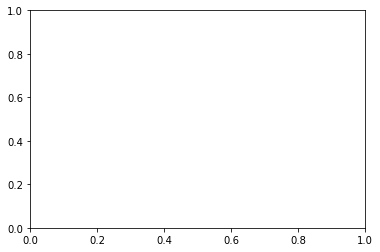

In [964]:
df_display1=mini_df_traite
#df_display1= standardize_df_MinMax(new_df)
fig = plt.figure()
ax = fig.add_subplot(111)


#ax.plot(df_display1.index, df_display1["lambdaP0"], color='red')
ax.plot(df_display1["Pression"], df_display1["lambdaP6"], color='blue')
#ax.set_xlim(0.5, 4.5)
plt.show()

In [649]:
main_df_non_traite = general_concat2(data_folder)

C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_120.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_120.xls
120.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_150.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_150.xls
150.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_180.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_180.xls
180.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_30.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_30.xls
30.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_60.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_60.xls
60.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_90.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_90.xls
90.0


In [202]:
main_df_non_traite["Temperature"].mean()

121.63488767226733

[30.0, 60.0, 90.0, 120.0, 150.0, 180.0]

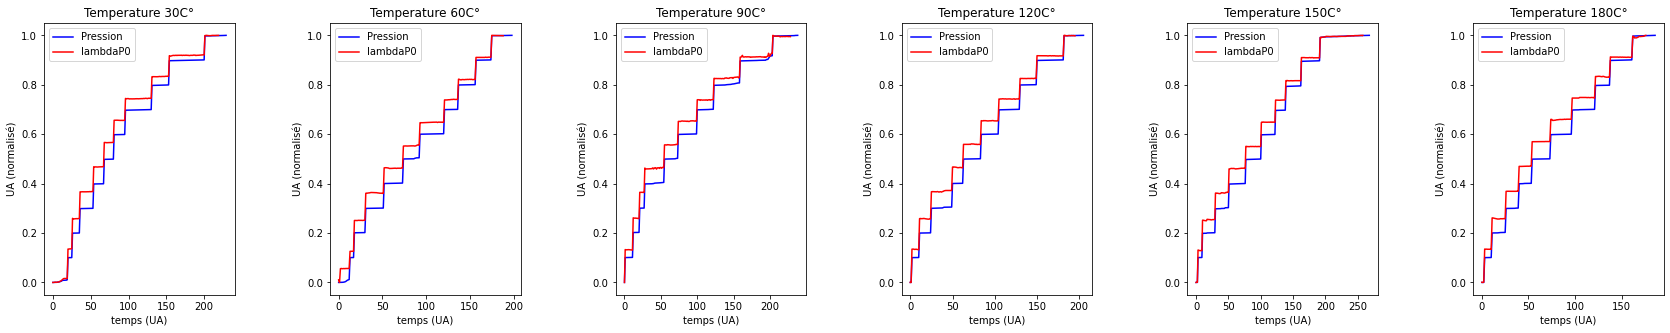

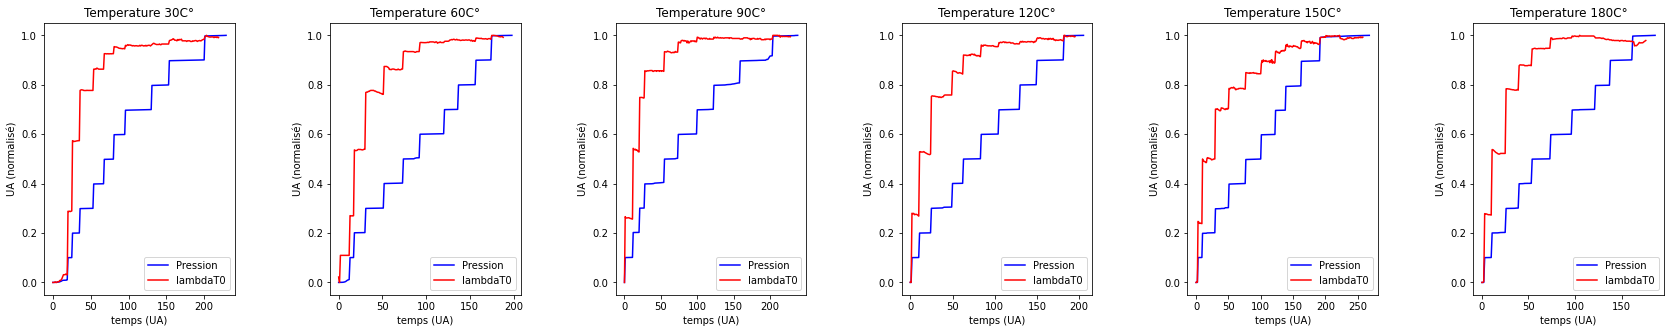

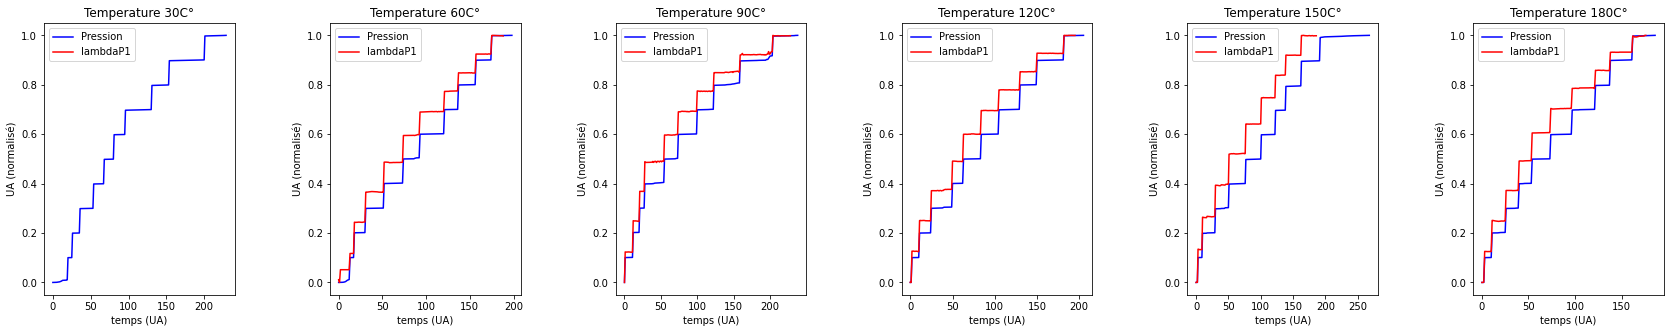

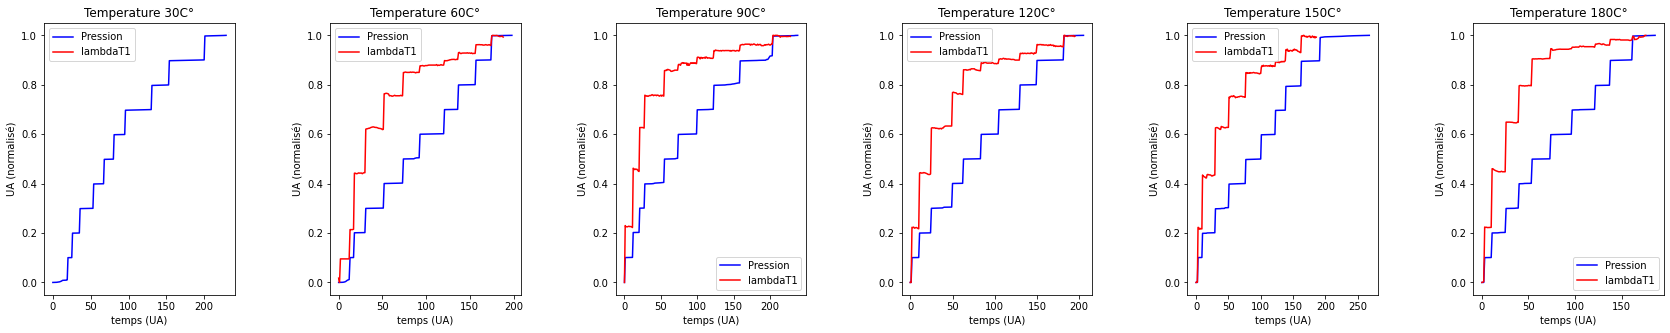

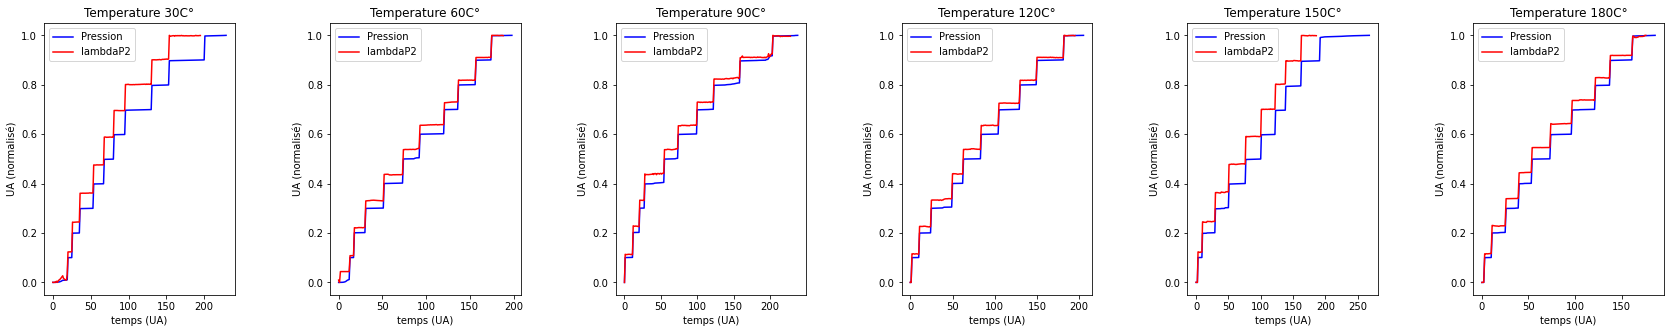

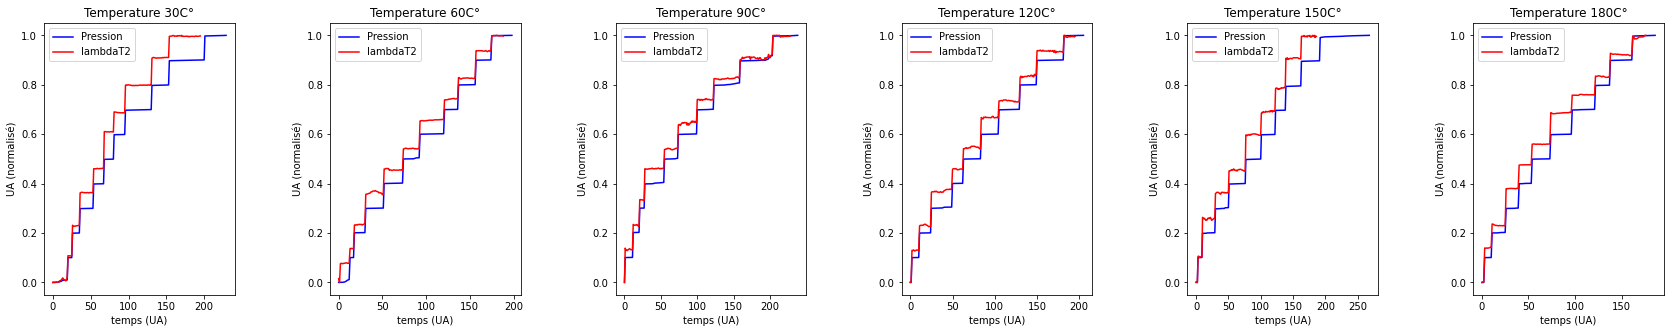

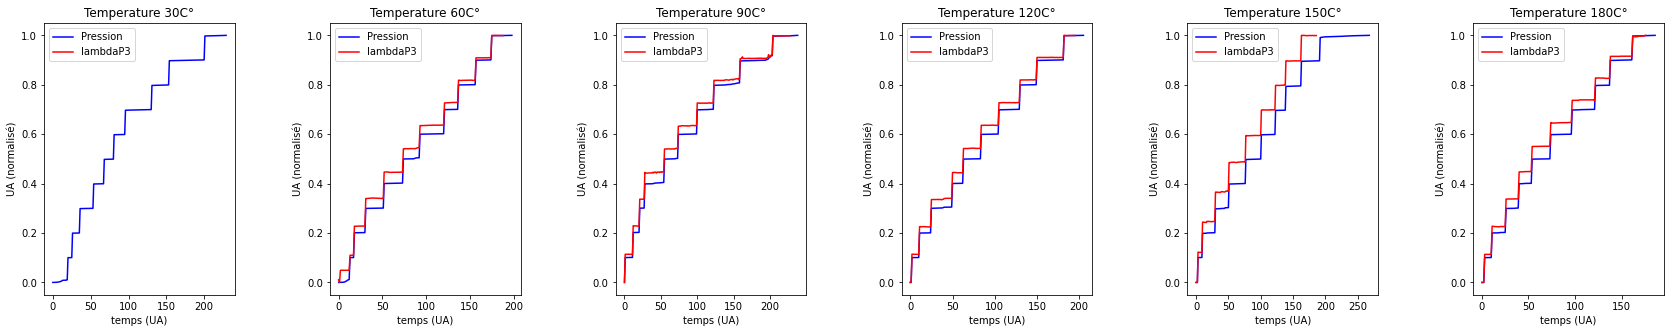

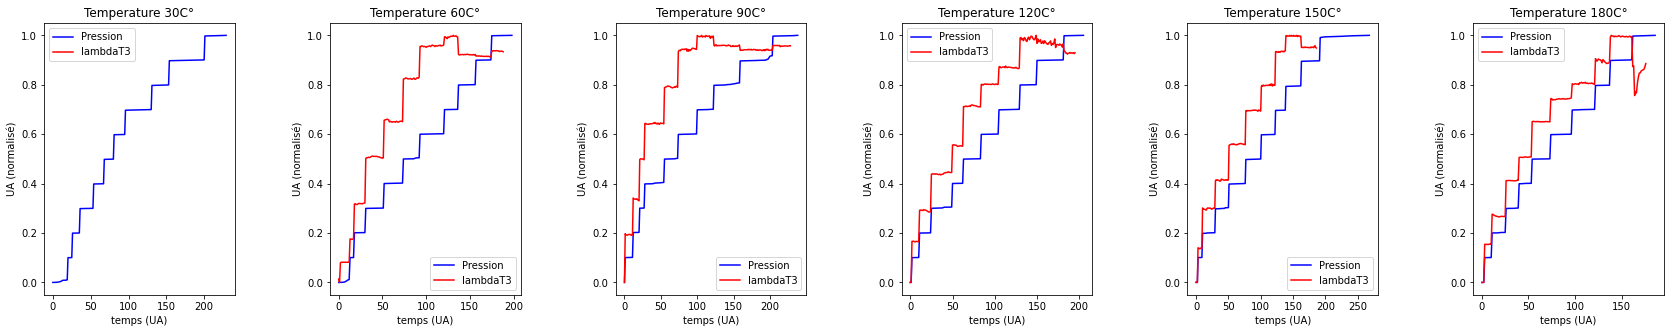

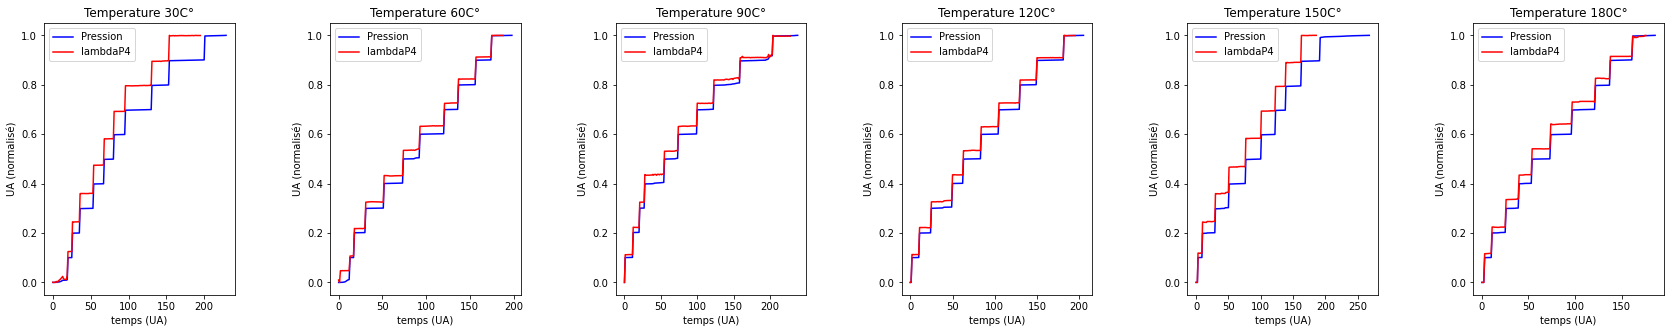

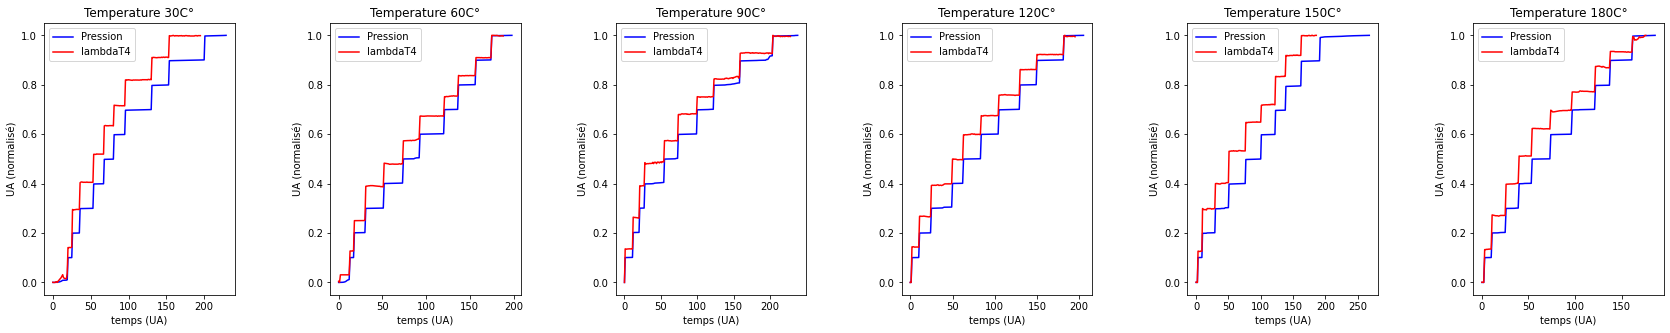

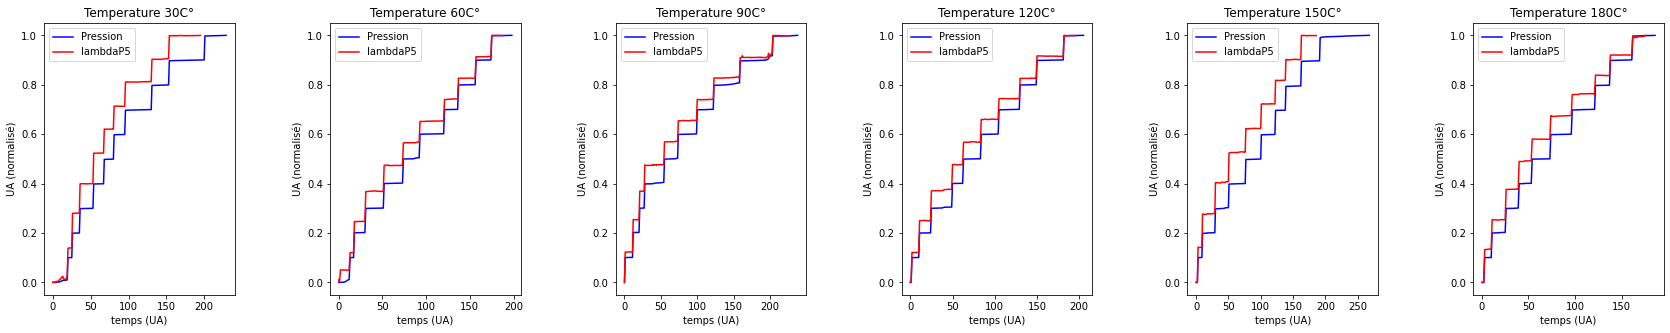

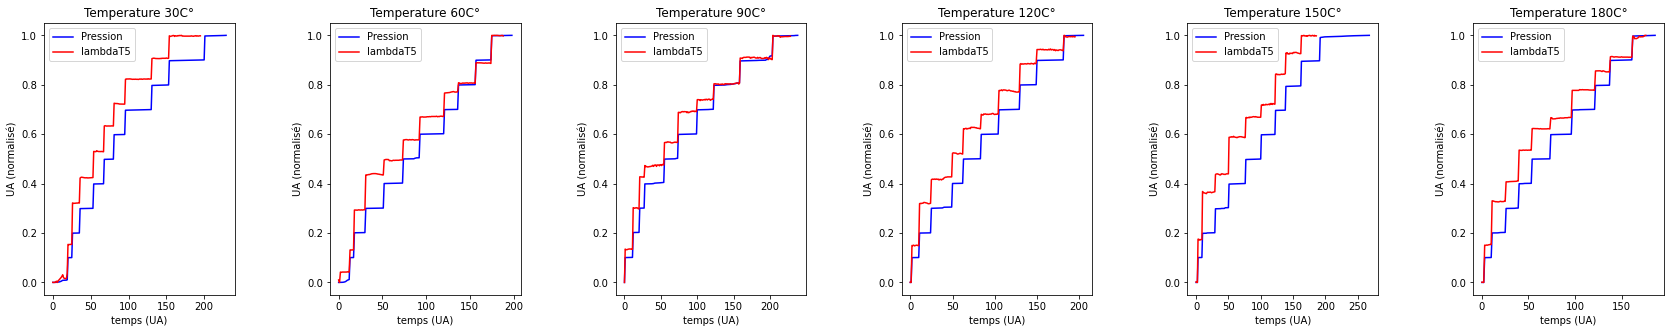

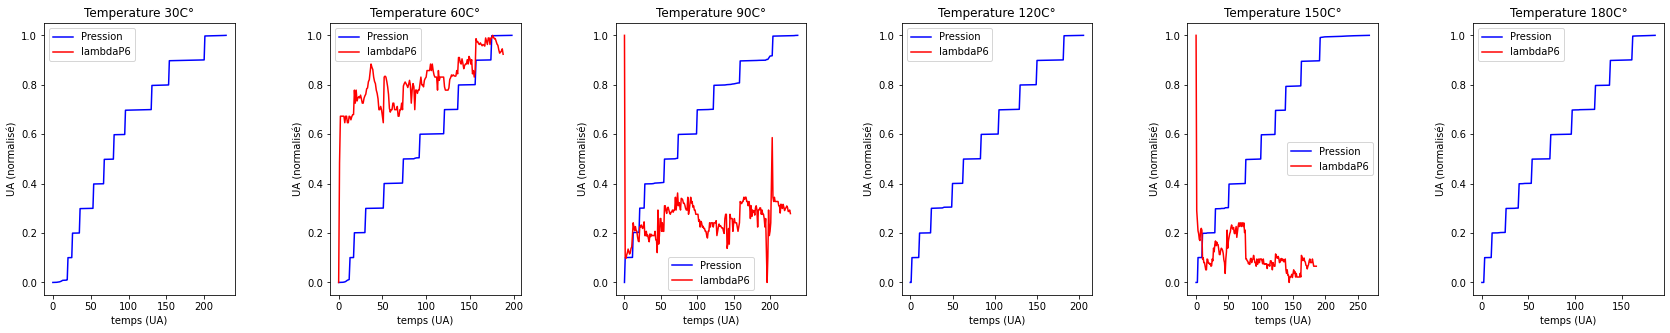

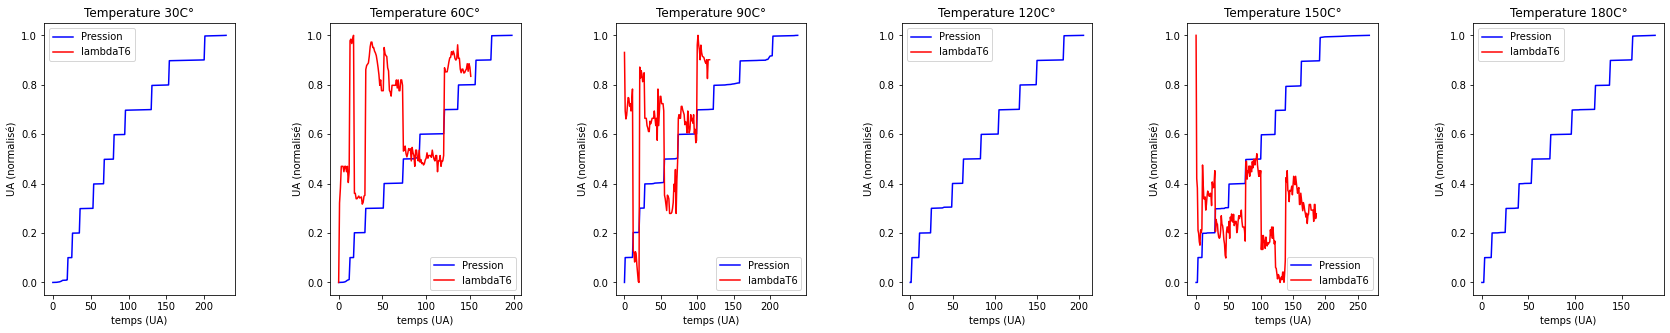

In [996]:

df= main_df

temp_list =  [i for i in list(df["Temperature"].unique()) if i>0]
temp_list.sort()
temp_list

features = [z for z in list(df.columns)if str(z)!="Pression" and str(z)!="Temperature"]

for name_col in features:
    
        fig =plt.figure(figsize=(70,5))
        

        for  i,temp in enumerate(temp_list) :


            df_display=df[df["Temperature"]==temp]
            df_display=standardize_df_MinMax(df_display)
            df_display = df_display.reset_index(drop=True)

            ax = fig.add_subplot(1,len(features),i+1)
            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.50, hspace=None)

            x=df_display.index
            y1=df_display["Pression"]
            ax.plot(x,y1,"blue",label="Pression")


            y2=df_display[str(name_col)]
            ax.plot(x,y2,"red",label=str(name_col))
            
            

            leg = ax.legend()
            ax.set_title("Temperature "+str(int(temp))+"C°")
            #ax.set_xlim(0, 50)
            #ax.set_ylim(0, 30)
            ax.set_xlabel("temps (UA)")
            ax.set_ylabel("UA (normalisé)")
        

In [858]:
main_df.groupby(["Pression","Temperature"], as_index=False)[list_col].mean()

,Pression,Temperature,lambdaP0,lambdaT0,lambdaP1,lambdaT1,lambdaP2,lambdaT2,lambdaP3,lambdaT3,lambdaP4,lambdaT4,lambdaP5,lambdaT5,lambdaP6,lambdaT6
0,0.000,60.0,1518.483500,1520.626500,1524.618000,1526.627500,1530.428000,1532.604500,1541.628,1544.317000,1548.734500,1550.5705,1560.488000,1562.584000,NaN,1574.2755
1,0.000,90.0,1518.821333,1520.978000,1524.955667,1526.983000,1530.740000,1532.949667,1541.912,1544.645333,1549.045333,1550.9090,1560.815333,1562.921333,1572.185,1574.7000
2,0.000,120.0,1519.216000,1521.376333,1525.349667,1527.391333,1531.143333,1533.350667,1542.269,1545.032333,1549.413000,1551.2920,1561.213667,1563.310000,NaN,NaN
3,0.000,150.0,1519.637000,1521.817000,1525.787000,1527.820000,1531.572000,1533.804000,1542.677,1545.467000,1549.817000,1551.7290,1561.634000,1563.749000,1573.070,1575.5570
4,0.000,180.0,1520.109000,1522.295000,1526.257000,1528.291000,1532.054000,1534.260000,1543.138,1545.926000,1550.263000,1552.1920,1562.114000,1564.247000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,15.083,150.0,1520.986800,1522.235000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,15.084,150.0,1520.974000,1522.234000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,15.085,150.0,1520.986000,1522.235000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,15.086,150.0,1520.986000,1522.235000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [857]:
list_col

['lambdaP0',
 'lambdaT0',
 'lambdaP1',
 'lambdaT1',
 'lambdaP2',
 'lambdaT2',
 'lambdaP3',
 'lambdaT3',
 'lambdaP4',
 'lambdaT4',
 'lambdaP5',
 'lambdaT5',
 'lambdaP6',
 'lambdaT6']

In [835]:
df_new=pd.DataFrame(df_new)

KeyError: 'Column not found: 6'

In [849]:
listus_df_mean

[]

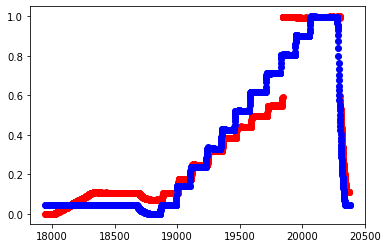

In [997]:
df_display=main_df_non_traite[main_df_non_traite["Temperature"]==90]
df_display= standardize_df_MinMax(df_display)
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(df_display.index, df_display["lambdaP8"], color='red')
ax.scatter(df_display.index, df_display["Pression"], color='blue')
#ax.set_xlim(0.5, 4.5)
plt.show()

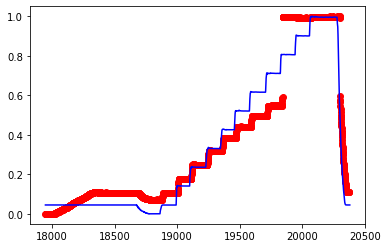

In [727]:
df_display1=main_df[main_df["Temperature"]==90]
df_display1= standardize_df_MinMax(df_display1)
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(df_display.index, df_display["lambdaP8"], color='red')
ax.plot(df_display.index, df_display["Pression"], color='blue')
#ax.set_xlim(0.5, 4.5)
plt.show()

In [21]:
df_display=standardize_df_std(mini_df)

fig = plt.figure()
ax = fig.add_subplot(111)



ax.plot(df_display["Pression"], df_display["lambdaT6"], color='green')
#ax.set_xlim(0.5, 4.5)
plt.show()

NameError: name 'standardize_df_std' is not defined

In [22]:
def trait_list_file (file_tot):
    
    list_couple=[]
    for ele in file_tot:
        if re.findall(r'\d+',ele.name)!=[]:
            temp = float(re.findall(r'\d+',ele.name)[-1])
            for ele2 in file_tot:
                if re.findall(r'\d+',ele2.name)!=[]:
                    if temp == float((re.findall(r'\d+',ele2.name)[-1])):
                        if ele!=ele2 :

                                list_couple.append((ele,ele2))

    for i,ele in enumerate(list_couple):
        for j,ele in enumerate(list_couple):
            if i!=j:
                if list_couple[i][0]==list_couple[j][1]:
                    list_couple.remove(list_couple[j])
    return list_couple

In [23]:
def df_P_T_Lambda_lies (fichier_channel, fichier_pression):
    
    

    temp = float(re.findall(r'\d+',str(fichier_channel.name))[-1])
    print(temp)
    
    length= len(pd.read_table(fichier_channel,delim_whitespace=True,error_bad_lines=False,warn_bad_lines=False).columns)
    renommage_col=["col_name"+str(i) for i in range(0,length)]
    df_channel = pd.read_table(fichier_channel,decimal=",", delim_whitespace=True,error_bad_lines=False,names=renommage_col)
    
    
    df_pression = pd.read_excel(fichier_pression)
    df_pression["Temperature"] = temp
    return df_channel,df_pression

In [24]:
def construction_df(df_pression,df_channel):

    list_nom_colonnes = ["date","hour"]
    poubelle = []
    for i in range(0,len((df_channel.columns))-6,6):
        #print(i)
        index = i//6
        list_nom_colonnes.append("lambdaP"+str(index))
        list_nom_colonnes.append("P_Amp"+str(index))
        list_nom_colonnes.append("C"+str(index))
        list_nom_colonnes.append("lambdaT"+str(index))
        list_nom_colonnes.append("T_Amp"+str(index))
        list_nom_colonnes.append("F"+str(index))

        poubelle.append("P_Amp"+str(index))
        poubelle.append("C"+str(index))
        poubelle.append("T_Amp"+str(index))
        poubelle.append("F"+str(index))


    df_channel.columns = list_nom_colonnes

    #for name_col in df_channel.columns[2:]:
            #df_channel[str(name_col)] = df_channel[str(name_col)].apply(lambda x: np.float(x.replace(",",".")))

    #df_channel["date"] = df_channel["date"]+str(" ")+df_channel["hour"]
    del df_channel['hour']
    del df_channel['date']
    #pd.to_datetime(df_channel['date'])

    df_channel = df_channel.drop(columns=poubelle)
    
    
    
    df_n = pd.concat([df_pression,df_channel],axis=1)
    list_colo_drop=["Datetime","Unit","Temperature(℃)","Interval(s)"]
    df_n = df_n.drop(columns=list_colo_drop)
    df_n =df_n.rename(columns={"Pressure":"Pression"})
    
    
    return df_n

In [25]:
def standardize_df_MinMax(df):
    df=(df-df.min())/(df.max()-df.min())
    return df

In [26]:
def standardize_df_std(df):
    df=(df-df.mean())/(df.std())
    return df

In [27]:
def gaussian_smooth(df):
    df.rolling(window=20, win_type='gaussian', center=True).mean(std=5)
    return df

In [28]:
def create_diff(df):
    df["diff_Pression"]=df["Pression"].diff(10)
    for ele in df.columns:
        if ele.startswith("lambdaP") or ele.startswith("lambdaT"):
            df["diff_"+str(ele)]=df[ele].diff(10)
    return df

In [29]:
def correlator_1(df,name_col1,name_col2):
    df = df.fillna(0)
    corr_list = [df[str(name_col1)].corr(df[str(name_col2)].shift(i)) for i in range(-len(df)//2,len(df)//2,1)]
    #corr_list = [0 if np.isnan(x) else x for x in xcov_monthly]


    corr_list = np.array(corr_list)
    corr_max = np.max(corr_list)
    tau = np.argmax(corr_list) - (len(df)//2)

    return corr_max,tau

In [30]:
def correlator_2(df,name_col1,name_col2):
    
    
    df=(df-df.min())/(df.max()-df.min())
    df = df.fillna(0)
    

    
    x= np.array(df[str(name_col1)] )
    y = np.array(df[str(name_col2)])
    corr = sp.signal.correlate(x,y,mode="full")
    corr_max = np.max(corr)/len(df) #génére une valeur de corrélation peu interpretable
    tau = np.argmax(corr)- len(df)
    
    corr_max = df[str(name_col1)].corr(df[str(name_col2)].shift(tau))# on préfère la méthode de Pandas qui renvoie une valeur comprise entre 0 et 1

    return corr_max,tau

In [31]:
def dict_decalage (df) :
    df=np.abs(df)
    df=(df-df.min())/(df.max()-df.min())
    dict_decal_tot={}
    dict_decal={}
    for ele in df.columns:
        if ele.startswith("lambdaP") or ele.startswith("lambdaT"):
            if correlator_2(df,"diff_Pression","diff_"+str(ele))[0] >0.6: 
                    dict_decal[ele]=correlator_2(df,"diff_Pression","diff_"+str(ele))
                    dict_decal_tot[ele] = correlator_2(df,'diff_Pression',"diff_"+str(ele))[0]
            else:
                if ele.startswith("lambdaP"):
                    if dict_decal.get("lambdaT0") is not None:
                            dict_decal[ele]=dict_decal["lambdaP0"]
                    else:
                            dict_decal_tot[ele] = correlator_2(df,'diff_Pression',"diff_"+str(ele))[0]
                elif ele.startswith("lambdaT"):
                    if dict_decal.get("lambdaT0") is not None:
                            dict_decal[ele]=dict_decal["lambdaT0"]
                    else:
                            dict_decal_tot[ele] = correlator_2(df,'diff_Pression',"diff_"+str(ele))[0]
    
    return dict_decal,dict_decal_tot

    

In [32]:
def decalator (df, dict_decal):
    
    #Prend une df et un dictionnaire des decalages et retourne le df augmenté des colonnes décalées

    for ele in df.columns:
        if str(ele) in dict_decal:
            #print("decalage fait pour "+str(ele))
            tau = dict_decal[str(ele)][1]
            df["decale_"+str(ele)] = df[ele].shift(tau).ffill()            

        
        if str(ele) not in dict_decal:
        
        
            if  str(ele).replace("P","T") in dict_decal:
                tau = dict_decal[str(ele).replace("P","T")][1]
                df["decale_"+str(ele)] = df[ele].shift(tau).ffill() 
            
            if  str(ele).replace("T","P") in dict_decal:
                tau = dict_decal[str(ele).replace("T","P")][1]
                df["decale_"+str(ele)] = df[ele].shift(tau).ffill() 
            
            
            else:
                1
   
    return df

In [33]:
def plotter (df,name_col1,name_col2):
    
    #Standardiser les grandeurs à afficher   
    plt.plot(df.index,df[str(name_col1)] )
    plt.plot(df.index,df[str(name_col2)] )

In [34]:
def borneur_df(df):
    
    #delimite la zone d'intéret du dataframe et retourne l'intervalle de celle-ci sous la forme d'une limite gauche et droite(low et high index)
    #utilise la "dérivée" de la pression pour ce faire

    
    
    new_df_std = (df-df.mean())/(df.std())
    new_df_std = new_df_std.rolling(window=20, win_type='gaussian', center=True).mean(std=5)
    derivee_pression= new_df_std["Pression"].diff(10)
    
    #fonction de scipy signal qui permet de trouver les pics. Ici, on trouve les pics correspondant aux paliers de montées et descentes en pression successives
    #On se base sur la descente en pression de fin d'etalonnage pour mesurer déterminer la limite droite
    # on se base sur le premier pic de montée en pression pour déterminer la limoite gauche
    peaker_pressure = sp.signal.find_peaks(-(derivee_pression),prominence=0.01,distance = 600)
    

    #plt.plot(new_df.index,new_df['Pression'] )
    #plt.plot(new_df_std.index,(new_df_std['diff_Pression']) )


    limit_left = peaker_pressure[0][0]
    limit_right = peaker_pressure[0][-1]-50
    
    return (limit_left,limit_right)



In [35]:
def montee_palier_remover(df):
    
    
    #en effectuant la dérivée on retrouve les montées de palier qui se matérialise par des pics
    new_df_std = (df-df.mean())/(df.std())
    new_df_std = new_df_std.rolling(window=20, win_type='gaussian', center=True).mean(std=5)
    derivee_pression= new_df_std["Pression"].diff(10)
    
    #le peak finder de scipy va travailler uniquement sur les pics positifs
    peaker_pressure = sp.signal.find_peaks(+(derivee_pression),prominence=0.1,distance = 1)
    
    
    #A partir du centre des pics, on crée une liste permettant de créer les intervalles hors pics
    interval = [0]

    for ele in peaker_pressure[0]:
    
        ele-20
        ele+20

        interval.append(ele-20)
        interval.append(ele+20)
    interval.append(interval[-1]+len(df))    
    
    #On crée une liste vide pour y mettre les df ne comprennant pas les pics
    list_ndf = [] 
    for k in range(0,len(interval),2):
        if k+1<len(interval):
            #print(k)
            list_ndf.append(df.iloc[interval[k]:interval[k+1]])
    
    #on crée le nouveau df amputé de ses pics:
    df_sliced = pd.concat(list_ndf)
    
    return df_sliced


In [36]:
def correlator_warning(df):
    df_traite=(df.copy())
    a_list=[]
    df_traite["diff_Pression"]=df_traite["Pression"].diff(10)
    for ele in df_traite.columns:
        
            if ele.startswith("lambdaP") or ele.startswith("lambdaT"):
                df_traite["diff_"+str(ele)]=df_traite[str(ele)].diff(10)
                a_list.append((ele, correlator_2(df_traite,"diff_Pression","diff_"+str(ele))))
        
    return print(a_list)

In [37]:
def Ndf_courbes_decalees(df):
    list_garde = []
    
    limit_left = borneur_df(df)[0]
    limit_right = borneur_df(df)[1]
    #print(limit_left,limit_right)
    
    
    df = df[limit_left:limit_right]
    df = montee_palier_remover(df)
    #df = df.reset_index().drop(columns='index')
    
    
    
    for ele in df.columns:
        if ele.startswith('decale_'):
            list_garde.append(str(ele))
            
    mini_df = df[list_garde]
    for ele in mini_df.columns:
        if ele.startswith('decale_'):
            mini_df.rename(columns={str(ele):str(ele).replace("decale_","")}, inplace=True)
    mini_df['Pression'] = df['Pression']
    mini_df['Temperature'] = df['Temperature']     
    
    mini_df = mini_df[mini_df['Pression']>=0]
    mini_df = mini_df[mini_df['Pression']<=15.5]
    mini_df = mini_df.reset_index().drop(columns='index')
    return mini_df

In [1008]:

def remove_all_above(df):
    right_stop =[]
    df=df.copy()
    new_df_std = (df-df.mean())/(df.std())
    new_df_std = new_df_std.rolling(window=20, win_type='gaussian', center=True).mean(std=5)
    
    for ele in new_df_std.columns:
        
        if ele.startswith("lambdaP") or ele.startswith("lambdaT"):
            
            

            derivee_pression= new_df_std[ele].diff(10)
    
            #fonction de scipy signal qui permet de trouver les pics. Ici, on trouve les pics correspondant aux paliers de montées et descentes en pression successives
            #On se base sur la descente en pression de fin d'etalonnage pour mesurer déterminer la limite droite
            # on se base sur le premier pic de montée en pression pour déterminer la limoite gauche
            peaker_pressure = sp.signal.find_peaks(-(derivee_pression),height=1)

            #plt.plot(new_df_std.index,(derivee_pression) )
            if len(peaker_pressure[0]) >0:
                limit_right = peaker_pressure[0][-1]
            else:
                limit_right = len(df)
            right_stop.append((str(ele),limit_right))
            
            df[str(ele)][limit_right-30:] = np.nan
    return df,right_stop

In [1068]:
data_folder = Path("C:\\Users\\axelo\\OneDrive\\Bureau\\Etalonnage 2019\\chaine1")

In [1069]:
main_df = general_concat(data_folder)

C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_120.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_120.xls
120.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_150.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_150.xls
150.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_180.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_180.xls
180.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_30.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_30.xls
30.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_60.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_60.xls
60.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Channel1_90.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine1\Pression_90.xls
90.0


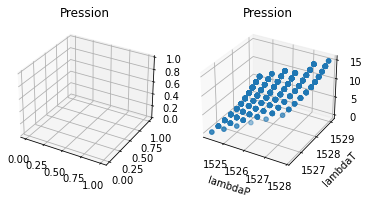

In [1070]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(xs=main_df['lambdaP0'], ys= main_df['lambdaT0'],zs= main_df['Pression'])

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(xs=main_df['lambdaP1'], ys= main_df['lambdaT1'],zs= main_df['Pression'])

ax1.set_title('Pression')
plt.ylabel('lambdaT')
plt.xlabel('lambdaP')
ax2.set_title('Pression')
plt.ylabel('lambdaT')
plt.xlabel('lambdaP')


plt.show()

In [1071]:
number_list = (re.findall('[0-9]+',str(main_df.columns)))
list_plop=[]
for ele in number_list:
    
    if int(ele) not in list_plop:
        list_plop.append(int(ele))

1
2
3
4
5
6
7
8
0


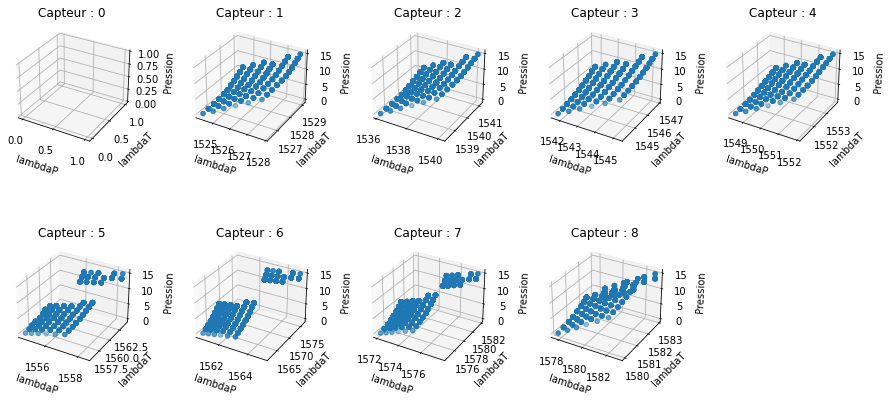

In [1072]:
fig = plt.figure(figsize=(15,15))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in list_plop:
    print(i)
    ax = fig.add_subplot(4, 5,i+1,projection='3d')
    ax.scatter(xs=main_df['lambdaP'+str(i)], ys= main_df['lambdaT'+str(i)],zs= main_df['Pression'])
    ax.set_xlabel('lambdaP')
    ax.set_ylabel('lambdaT')
    ax.set_zlabel('Pression')
    ax.set_title("Capteur : "+str(i))

In [1032]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

def regression_results2(y_true, y_pred):

    # Regression metrics
    mse=metrics.mean_squared_error(y_true, y_pred,squared=True) 
    rmse=metrics.mean_squared_error(y_true, y_pred,squared=False) 
    rmse = round(rmse,4)
    r2=metrics.r2_score(y_true, y_pred)
    #print('r2: ', round(r2,4))
    #print('MSE: ', round(mse,4))
    #print('RMSE: ', rmse)
    return rmse
   


In [1034]:
number_list = (re.findall('[0-9]+',str(main_df.columns)))
list_plop=[]
for ele in number_list:
    
    if int(ele) not in list_plop:
        list_plop.append(int(ele))

In [1073]:
list_rmse =[]
for i in list_plop:
    print(i)
    df_capt=main_df.copy()[['lambdaP'+str(i),'lambdaT'+str(i),'Pression']]
    df_capt = df_capt.dropna(0)
    
    
    X_train, X_test, y_train, y_test = train_test_split(df_capt[['lambdaP'+str(i),'lambdaT'+str(i)]], df_capt['Pression'], test_size=0.2,random_state = 42)
    poly = PolynomialFeatures(degree = 2) 
    X_poly = poly.fit_transform(X_train) 

    poly.fit(X_poly, y_train) 
    lin2 = linear_model.LinearRegression() 
    lin2.fit(X_poly, y_train)
    # Predicting a new result with Polynomial Regression 
    y_pred = lin2.predict(poly.fit_transform(X_test))

    #print(lin2.coef_)
    #print(len(lin2.coef_))
    regression_results2(y_test, y_pred)
    list_rmse.append((i,regression_results2(y_test, y_pred)))
    #print(lin2.intercept_,lin2.coef_)
pd_rmse = pd.DataFrame(list_rmse,columns=['capteur','rmse'])
pd_rmse

1
2
3
4
5
6
7
8
0


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [1067]:
df_capt.empty

False

In [869]:
pd_rmse.mean()

capteur    3.000000
rmse       0.619243
dtype: float64

In [870]:
pd_rmse[pd_rmse["capteur"]!=6].mean()

capteur    2.500000
rmse       0.151567
dtype: float64

In [762]:
pd_rmse[pd_rmse["capteur"].between(0,5)]["rmse"].mean()

0.17920000000000003

In [1621]:
data_folder = Path("C:\\Users\\axelo\\OneDrive\\Bureau\\Etalonnage 2019\\chaine3")

In [1833]:
main_df=general_concat(data_folder)

C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Channel1_120.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Pression_120.xls
120.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Channel1_150.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Pression_150.xls
150.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Channel1_180.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Pression_180.xls
180.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Channel1_30.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Pression_30.xls
30.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Channel1_60.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Pression_60.xls
60.0
C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Channel1_90.txt C:\Users\axelo\OneDrive\Bureau\Etalonnage 2019\chaine3\Pression_90.xls
90.0


In [1834]:
dict_lambda_centre["lambdaP0"]=1511.706
dict_lambda_centre["lambdaT0"]=1513.666
dict_lambda_centre["lambdaP1"]=1523.670
dict_lambda_centre["lambdaT1"]=1526.374
dict_lambda_centre["lambdaP2"]=1529.272
dict_lambda_centre["lambdaT2"]=1531.545
dict_lambda_centre["lambdaP3"]=1554.224548
dict_lambda_centre["lambdaT3"]=1556.692898
dict_lambda_centre["lambdaP4"]=1565.772
dict_lambda_centre["lambdaT4"]=1568.285
dict_lambda_centre["lambdaP5"]=1570.836
dict_lambda_centre["lambdaT5"]=1574.321
dict_lambda_centre["lambdaP6"]=1577.781
dict_lambda_centre["lambdaT6"]=1580.144

In [1835]:
df_capt0 = main_df[["lambdaP0","lambdaT0","Pression","Temperature"]]

In [1836]:
df_capt0

,lambdaP0,lambdaT0,Pression,Temperature
0,1513.011812,1515.028437,0.000,120.0
1,1513.012283,1515.028957,0.001,120.0
2,1513.012216,1515.028973,0.002,120.0
3,1513.208400,1515.149400,1.511,120.0
4,1513.209059,1515.149882,1.512,120.0
...,...,...,...,...
1311,NaN,NaN,15.029,90.0
1312,NaN,NaN,15.030,90.0
1313,NaN,NaN,15.031,90.0
1314,NaN,NaN,15.032,90.0


In [1851]:
data=df_capt0

In [1852]:
data=data.dropna()

In [1853]:
for name in data.columns:
    if name.startswith("lambdaP"):
        x=((data[str(name)]-dict_lambda_centre[str(name)])/dict_lambda_centre[str(name)])*1.0E06
    if name.startswith("lambdaT"):
        y=((data[str(name)]-dict_lambda_centre[str(name)])/dict_lambda_centre[str(name)])*1.0E06
    if name.startswith("Pression"):
        z=data[str(name)]
x, y ,z= x.values, y.values,z.values




In [1861]:
# fit a fifth degree polynomial to the economic data
from scipy.optimize import curve_fit

# define the true objective function
def objective (data, A, B, C, D, E, F,alpha,beta,gamma):
    

    x=data[0]
    y=data[1]

    M = (A*((x)**2)+B*(x)+C)-(D*((y)**2)+E*(y)+F)
    
    func=(-beta+(np.sqrt(np.abs((beta**2)-(4*alpha*(gamma-M))))))/2*alpha
    
    return func

In [1862]:
len(x),len(y),len(z)


(950, 950, 950)

In [1863]:
# curve fit
guess = (0,1,0,0,1,0,0.760498055,32.50581059,-50.11477572)
fittedParameters, pcov = curve_fit(objective,[x,y],z,guess,maxfev = 1000000)


In [1864]:
fittedParameters

array([ 1.32673051e-04,  1.16504887e+00,  1.23276548e+04,  1.17836396e-04,
        1.10813450e+00, -2.92743031e+03,  8.33731073e-01,  3.41939376e+01,
        1.52781181e+04])

In [1865]:
modelPredictions = objective([x,y], *fittedParameters) 

In [1866]:
absError = modelPredictions - z

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(z))

In [1867]:
RMSE

0.1306574154497741

(950, 950, 950)

array([  0.        ,   1.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.76049806,  32.50581059,
       -50.11477572])

(950, 950, 950)

1.1768930422320507

1267.4218907398413

-10.091491374588436

-10.091491374588436

In [1510]:
RMSE

0.36797789244865986

In [1084]:
data = df_capt0[df_capt0["Temperature"]!=180]
data = df_capt0.dropna()
# choose the input and output variables
xc=(data["lambdaP0"]-dict_lambda_centre["lambdaP0"])/dict_lambda_centre["lambdaP0"]
yc=(data["lambdaT0"]-dict_lambda_centre["lambdaT0"])/dict_lambda_centre["lambdaT0"]
x, y = xc.values, yc.values

z=data["Pression"].values
# curve fit
guess = (0,1,0,0,1,0,0.76,32,-50)
fittedParameters, pcov = curve_fit(objective,[x,y],z, guess,maxfev=5000)

list_data=[x,y]

modelPredictions = objective(list_data, *fittedParameters) 
absError = modelPredictions - z

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(z))

# plot input vs output
#pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
#x_line = arange(min(x), max(x), 1)
# calculate the output for the range
#y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
#pyplot.plot(x_line, y_line, '--', color='red')
#pyplot.show()

<ipython-input-736-42609a29ed6c>:24: RuntimeWarning: invalid value encountered in sqrt
  func=(-beta+np.sqrt(np.sqrt((beta**2)-4*alpha*(gamma-M))))/2*alpha
C:\Users\axelo\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [1089]:
z_pred = objective(list_data, *guess)

In [1093]:
z_pred

array([-9.93471615, -9.93471615, -9.93471615, ..., -9.93471513,
       -9.93471514, -9.93471514])

0      -0.999999
1      -0.999999
2      -0.999999
3      -0.999999
4      -0.999999
          ...   
1281   -0.999999
1282   -0.999999
1283   -0.999999
1284   -0.999999
1285   -0.999999
Name: lambdaP0, Length: 950, dtype: float64

In [737]:
fittedParameters,RMSE

(array([ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  9.25233783e-01, -8.93940554e+00,
        -1.05895281e+03]),
 4.998172542967204)

In [ ]:


def func(data, a,b,d):
    
    x=data[0]
    y=data[1]
    
    #result1 = (a1*x**4)+(b1*x**3)+(c1*x**2)+(d1*x)+(a2*y**4)+(b2*y**3)+(c2*y**2)+(d2*y)+f*x*y+e2
    #result2 = (a1*x**4)+(d1*x)+(a2*y**4)+(d2*y)+e2+f*x*y+e1*y*x**2
    result3 = (a*x)+(b*(y))+d
    return result3

metrics =[]

for i in range(0,20):
    captorId = i+1
    
    xdata = dfs[i].lambdaP.values
    ydata = dfs[i].lambdaT.values
    zdata = dfs[i].Pression.values


    data = [xdata,ydata,zdata]

    initialParameters = [1,1,1]

    fittedParameters, pcov = curve_fit(func, [xdata, ydata], zdata, p0 = initialParameters)
    #print('Fitted Parameters:', fittedParameters)

    modelPredictions = func(data, *fittedParameters) 

    absError = modelPredictions - zdata

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(zdata))
    
    #print('RMSE:', RMSE)
    #print('R-squared:', Rsquared)
    
    metrics.append([captorId,RMSE,fittedParameters])